# Loading DATASET 
We will first load the dataset. MNIST Dataset is consisted from 70,000 handwritten numeric digital images in the size of 28x28. 60,000 of them are for training and 10,000 of them for test set. MNIST dataset is already in torchvision 

In [2]:
# Getting the required libraries for loading dataset
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

import torchvision.datasets as dataset

mnist_trainset = dataset.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = dataset.MNIST(root='./data', train=False, download=True, transform=None)

#Lets Play with this data
len(mnist_trainset) #Length of training dataset
len(mnist_testset) #Length of test dataset

#Learn type of the data
print(type(mnist_trainset)) #Shows that type of the data
train_image_zero, train_target_zero = mnist_trainset[0] 
#train_image_zero.show() #Showing the image zero
print(train_target_zero.item()) #Class of the iMAGE 0

<class 'torchvision.datasets.mnist.MNIST'>
5


# Some of Images
- We learned how to download our dataset and showed the first index. In the next step, let's visualize them by using matplotlibrary.  

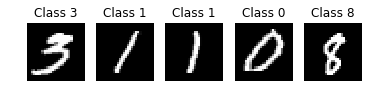

In [3]:
n = 5 #You should set here how many of them you want to visualize
for i in range(5):
    im = int(torch.randint(0,len(mnist_trainset),(1,1)).item())
    sample_im, label_im = mnist_trainset[im]
    ax = plt.subplot(1,n,i+1)
    ax.set_title('Class {}'.format(label_im.item()))
    ax.axis('off')
    plt.imshow(sample_im)

# Simple Sequential NN
- Let's create a simple sequantial NN to classify MNIST dataset. Due to the simplicity of exercise, in the first one I will not use autograd or neural network package.

In [8]:
# Define Parameters
epochs = 20 #Time of the epoch
batch_size = 2000 
learning_rate = 0.1

# Let's load the Data again as Tensor
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=len(test_dataset))

train_loader_whole = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                 batch_size=len(train_dataset), 
                                                 shuffle=True)

# We already know that each image is in the same size
print(len(mnist_trainset))

class SNN(nn.Module):
    def __init__(self):
        super(SNN, self).__init__() #Creates an instance based on nn.Module Class
        self.fc1 = nn.Linear(28*28, 200) #First layer of Neural Network
        self.fc2 = nn.Linear(200, 10)#Second Layer of Neural Network
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
#Lets see the instance of this class
net = SNN()
print(net)

#Stochastic Optimizer Network
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# create a loss function
criterion = nn.CrossEntropyLoss()

# Start the learning
# Forward-Pass
# run the main training loop
for epoch in range(epochs):
    TrueTrain = 0; TrueTest = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.reshape(-1, 28*28)
        # Forward pass
        outputs = net(data)
        loss = criterion(outputs, target)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{:.0f}], Loss: {:.4f}' 
                   .format(epoch+1, epochs, batch_idx+1, len(train_dataset)/batch_size, loss.item()))
            
    for _, (data, target) in enumerate(train_loader_whole): 
        data = data.reshape(-1, 28*28)
        outputs = net(data)
        max_index = outputs.max(dim = 1)[1]
        TrueTrain += (max_index == target).sum()

    for _, (data, target) in enumerate(test_loader): 
        data = data.reshape(-1, 28*28)
        outputs = net(data)
        max_index = outputs.max(dim = 1)[1]
        TrueTest += (max_index == target).sum()
    
    print( "Train Set Accuracy in Epoch {}/{} is %{:.2f}".format( epoch+1, epochs, TrueTrain.item()/len(mnist_trainset) * 100 ) )
    print( "Test Set Accuracy in Epoch {}/{} is %{:.2f}".format( epoch+1, epochs, TrueTest.item()/len(mnist_testset) * 100 ) )


60000
SNN(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)


/Users/mertkeser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/20], Step [10/30], Loss: 1.5550
Epoch [1/20], Step [20/30], Loss: 0.5614
Epoch [1/20], Step [30/30], Loss: 0.4384
Train Set Accuracy in Epoch 1/20 is %87.34
Test Set Accuracy in Epoch 1/20 is %87.90
Epoch [2/20], Step [10/30], Loss: 0.3673
Epoch [2/20], Step [20/30], Loss: 0.3882
Epoch [2/20], Step [30/30], Loss: 0.3518
Train Set Accuracy in Epoch 2/20 is %90.54
Test Set Accuracy in Epoch 2/20 is %91.18
Epoch [3/20], Step [10/30], Loss: 0.2900
Epoch [3/20], Step [20/30], Loss: 0.3078
Epoch [3/20], Step [30/30], Loss: 0.3214
Train Set Accuracy in Epoch 3/20 is %91.86
Test Set Accuracy in Epoch 3/20 is %92.30
Epoch [4/20], Step [10/30], Loss: 0.2712
Epoch [4/20], Step [20/30], Loss: 0.2375
Epoch [4/20], Step [30/30], Loss: 0.2690
Train Set Accuracy in Epoch 4/20 is %92.74
Test Set Accuracy in Epoch 4/20 is %92.84
Epoch [5/20], Step [10/30], Loss: 0.2192
Epoch [5/20], Step [20/30], Loss: 0.2200
Epoch [5/20], Step [30/30], Loss: 0.2309
Train Set Accuracy in Epoch 5/20 is %93.55
Te